In [2]:
from edahelper import *
wsb = pd.read_pickle('../Data/wsb_cleaned.pkl')

In [98]:
# Only keep posts where the author data is there.
wsb = wsb.loc[wsb.author != "None"]

In [99]:
author_posting = dict(wsb.author.value_counts())
author_df = (wsb.groupby('author')[['ups']] .agg('sum' ))
wsb['author_total_upvotes'] = wsb.author.apply( lambda x : author_df.loc[x]['ups'])

In [100]:
wsb['author_proliferacy'] = wsb.author.apply( lambda x : author_posting[x])

In [3]:
# num authors:

len ( set ( wsb['author']))

482754

In [5]:
wsb['author'].value_counts().head(100)

None                394635
WSBVoteBot            1422
Onboarding92          1104
AutoModerator          643
patrickbateman02       344
                     ...  
StonkWonker             56
Briterac                56
pmekonnen               56
OliverDatlon            56
Unsquidabls             56
Name: author, Length: 100, dtype: int64

In [101]:
author_df = wsb[['author', 'ups']].groupby('author').agg( [lambda x: tuple(x), 'count', 'sum', 'mean'])

In [102]:
pd.set_option('display.max_colwidth', None)
author_df[author_df[('ups', 'mean')] > 200].sort_values(by = ('ups', 'count'), ascending = False)['ups']['<lambda_0>'].head(20)

author
AutoModerator                                                                                                                                               (64, 37, 68, 84, 94, 6, 212, 82, 64, 132, 71, 73, 94, 72, 76, 66, 4, 86, 74, 79, 206, 289, 99, 148, 77, 112, 88, 6, 69, 129, 50, 120, 98, 89, 95, 85, 128, 134, 11, 102, 139, 148, 158, 120, 143, 113, 87, 118, 112, 2, 131, 145, 134, 220, 184, 181, 214, 172, 165, 21, 190, 178, 317, 172, 180, 186, 259, 174, 185, 159, 8, 131, 161, 212, 78, 249, 214, 263, 202, 319, 264, 7, 215, 214, 276, 320, 247, 277, 350, 272, 511, 334, 8, 387, 439, 372, 457, 457, 414, 344, ...)
1poundbookingfee                                                                                                                                            (25, 48, 26, 27, 35, 111, 57, 4629, 44, 77, 112, 73, 13, 1670, 289, 12, 244, 388, 1528, 146, 55, 11, 3, 48, 3, 43, 767, 74, 33, 66, 3, 100, 66, 2712, 437, 37, 35, 2900, 223, 474, 61, 1, 1111, 9664, 64, 10, 59, 203, 209

author
1poundbookingfee        AxesSubplot(0.125,0.125;0.775x0.755)
AutoModerator           AxesSubplot(0.125,0.125;0.775x0.755)
OPINION_IS_UNPOPULAR    AxesSubplot(0.125,0.125;0.775x0.755)
swaggymedia             AxesSubplot(0.125,0.125;0.775x0.755)
Name: <lambda_0>, dtype: object

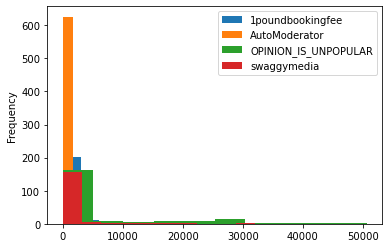

In [103]:
author_df[author_df[('ups', 'mean')] > 200].sort_values(by = ('ups', 'count'), ascending = False)['ups']['<lambda_0>'].head(4).explode().groupby('author').plot(kind = 'hist', legend = True)

They look kind of power law ish

So, maybe a reasonable model is to assume that, conditioned on the author, each posts upvotes comes from a power law distribution, with parameter that depends on the author. We can use empirical bayes to estimate the parameters for the authors.

(of course this isn't literally true, but the parameter from this model could be a useful feature that measures author popularity.)

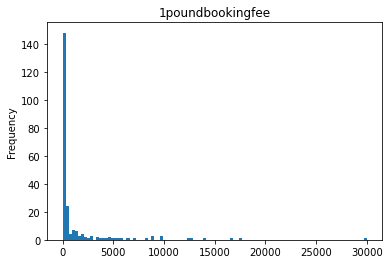

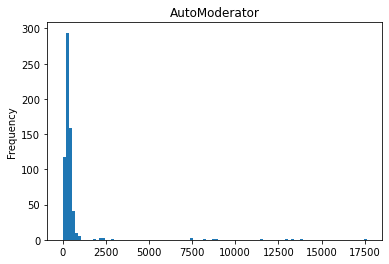

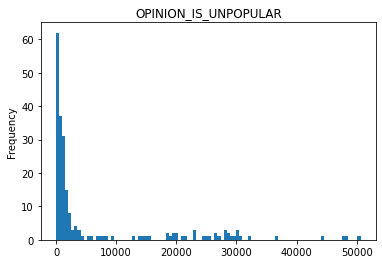

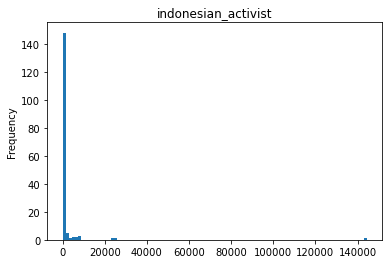

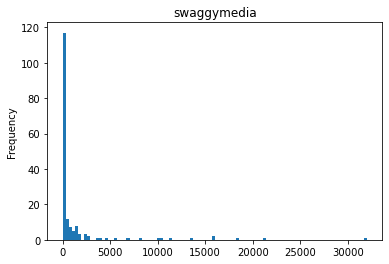

In [104]:

for name, df in author_df[author_df[('ups', 'mean')] > 500].sort_values(by = ('ups', 'count'), ascending = False)['ups']['<lambda_0>'].head(5).explode().groupby('author'):
    df.plot( kind = 'hist', title = name, bins = 100 )
    plt.show()

Need to look at the comment history of these people also, this will give a stronger history of their popularity / representativeness in the network. Otherwise, this seems too sparse.

## How can we deal with popularity changing over time? Does it happen? If so, how do you measure it?

### First, does it happen?